In [1]:
#Import library
from src import model

vc-relax is finished
relax is finished
scf is finished


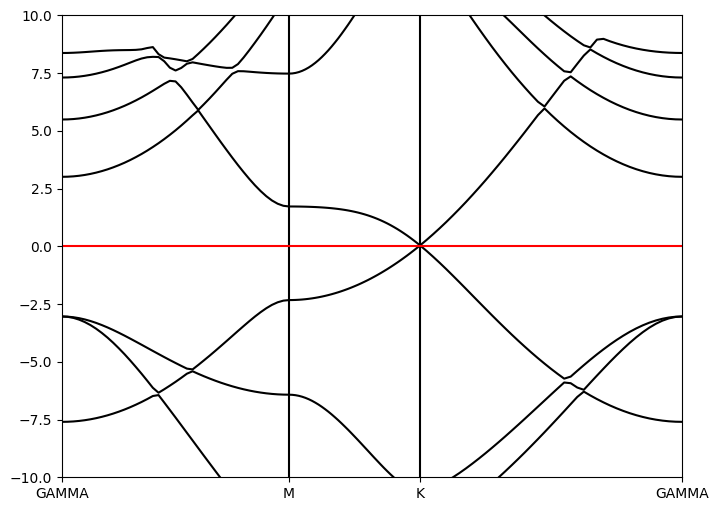

In [2]:
#Initialize model
pw = model.pw(project_id="C")

#Adjust parameters
pw.from_poscar(directory="C.poscar")
pw.ecutwfc(120)
pw.k_points(8)
pw.mixing_mode('local-TF')
pw.smearing('fd')
pw.degauss(0.01)
pw.conv_thr("1e-8")

#Optimize structure and calculate wave function
for calculation in ['vc-relax','relax','scf']:
    pw.set_calculation(calculation_type=calculation)
    pw.create_input()
    if calculation=='relax':
        pw.create_input(layer='mono')
    pw.calculate(num_core=8)
    print(f"{calculation} is finished")

#Define path
path = ['GAMMA','M','K','GAMMA']
pw.band_points(path,40)

#Calculate band
pw.set_calculation(calculation_type='bands')
pw.create_input()
pw.calculate(num_core=8)
pw.set_calculation('bands-pp')
pw.create_input()
pw.calculate(num_core=1)

#Plot graph
pw.plot_electron(ylim=[-10,10],save=True)

